In [4]:
from datetime import datetime
from csv import DictReader
import numpy as np
import time
import operator
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.basemap import Basemap
plt.style.use('bmh')

def datestr2num(ts):
    return datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d')
    
#init
np.set_printoptions(suppress=True)
start_time = time.time()
#folder = 'podatki/ml-latest-small/'
#podatke smo morali popraviti na viru, problematični znaki '-', '#', ',' 
terrorism = np.loadtxt('TerroristAttacks.csv', dtype='str', delimiter="|", skiprows = 2, encoding="ISO-8859-1")

Text(0.5, 1.0, 'Number Of Attacks Per Year')

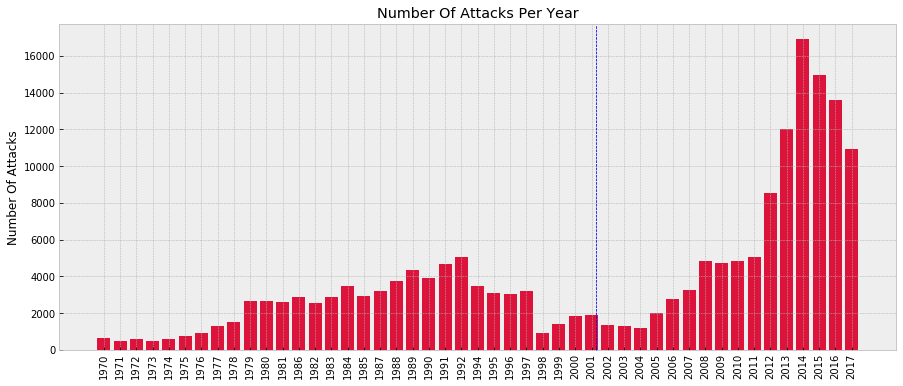

In [6]:
from collections import defaultdict

#seznam let
years = terrorism[:, 1]

number_of_attacks = defaultdict(int)

#slovar leto:št_napadov
for year in years:
    number_of_attacks[year] += 1
    
x = range(len(number_of_attacks))
plt.figure(figsize = (15, 6))
plt.bar(x, number_of_attacks.values(), color = 'crimson', align = 'center')
plt.xticks(x)
plt.gca().set_xticklabels(number_of_attacks.keys(), rotation = 90)
plt.text(30, 0, "------------------------------------------------------------------------------------------", rotation=90, verticalalignment="bottom", color="blue")
plt.ylabel('Number Of Attacks')
plt.title("Number Of Attacks Per Year")

Text(0.5, 1.0, 'Successful vs Unsuccessful Attacks For 20 Most Attacked Countries')

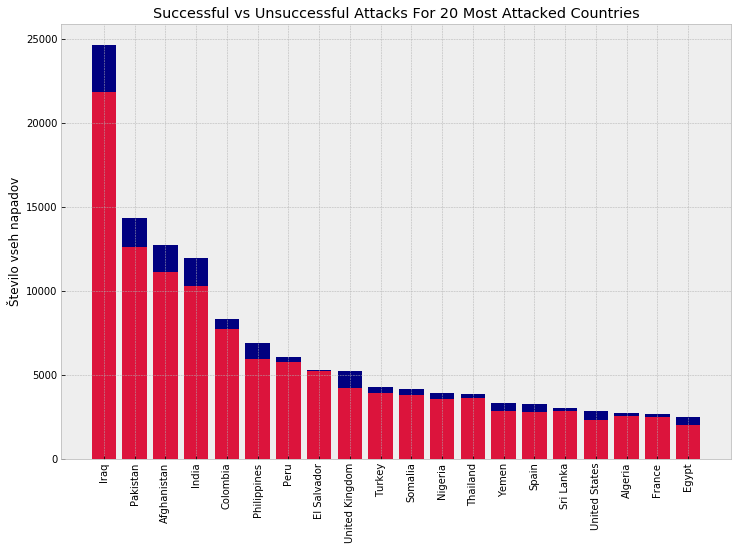

In [3]:
#seznam drzav
countries = terrorism[:, 6]

attacks_country = defaultdict(int)
for i in range(len(countries)):
    attacks_country[countries[i]] += 1
    
attacks_country = sorted(attacks_country.items(), reverse = True, key = lambda x: x[1])

success_true = []
success_false = []
success_country = []
attacks_country_success = defaultdict(list)
for i in range(20):
    success = terrorism[terrorism[:, 6] == attacks_country[i][0], 14]
    success_true.append(len(np.where(success == '1')[0]))
    success_false.append(len(np.where(success == '0')[0]))
    success_country.append(attacks_country[i][0])
    
x = range(len(success_country))

plt.figure(figsize = (12, 8))
plt.bar(x, success_true, color = 'crimson', align = 'center')
plt.bar(x, success_false, bottom = success_true, color = 'navy', align = 'center')
plt.xticks(x)
plt.gca().set_xticklabels(success_country, rotation = 90)
plt.ylabel('Število vseh napadov')
plt.title("Successful vs Unsuccessful Attacks For 20 Most Attacked Countries")

Text(0.5, 1.0, 'Number Of Attacks Per Month')

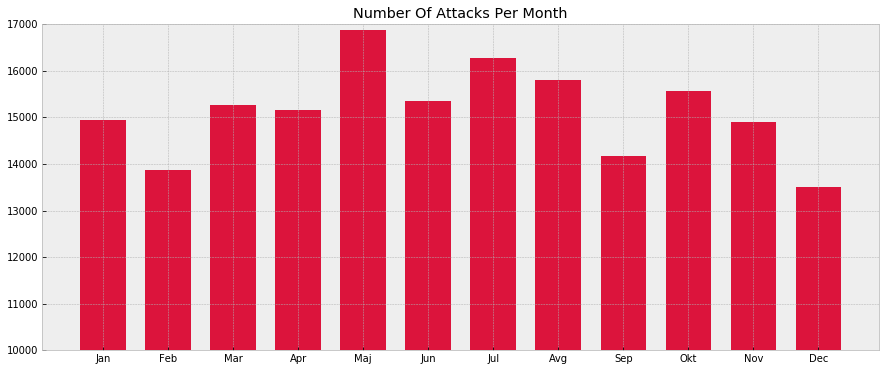

In [4]:
attacks_per_month = defaultdict(int)

for attack in terrorism:
    month = int(attack[2])
    if month > 0:
        attacks_per_month[month] += 1
    
sorted_attacks = [x[1] for x in sorted(attacks_per_month.items())]
    
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.bar(np.arange(1, 13), sorted_attacks, color = 'crimson', align="center", width=0.7)
axes.set_xticks(np.arange(1, 13))
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Maj", "Jun", "Jul", "Avg", "Sep", "Okt", "Nov", "Dec"])
axes.set_ylim((10000, 17000))
axes.set_title("Number Of Attacks Per Month")

Text(0, 0.5, 'Number of people killed')

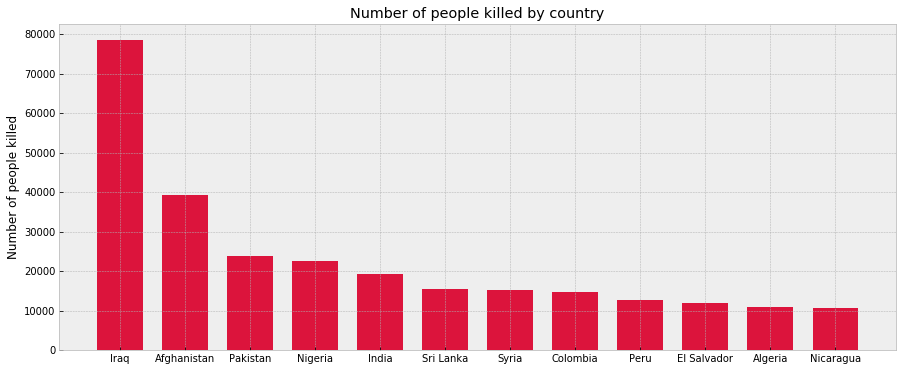

In [5]:
države = defaultdict(int)
for i in range(len(countries)):
    c = terrorism[i,22]
    if c != '':
        države[terrorism[i, 6]] += int(c)
        
country_killed = sorted([(x, države[x]) for x in države.keys() if države[x] > 1000], key=lambda tup: tup[1], reverse=True)[:12]
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.bar([x[0] for x in country_killed], [y[1] for y in country_killed], color = 'crimson', width=0.7)
axes.set_title("Number of people killed by country")
plt.ylabel('Number of people killed')

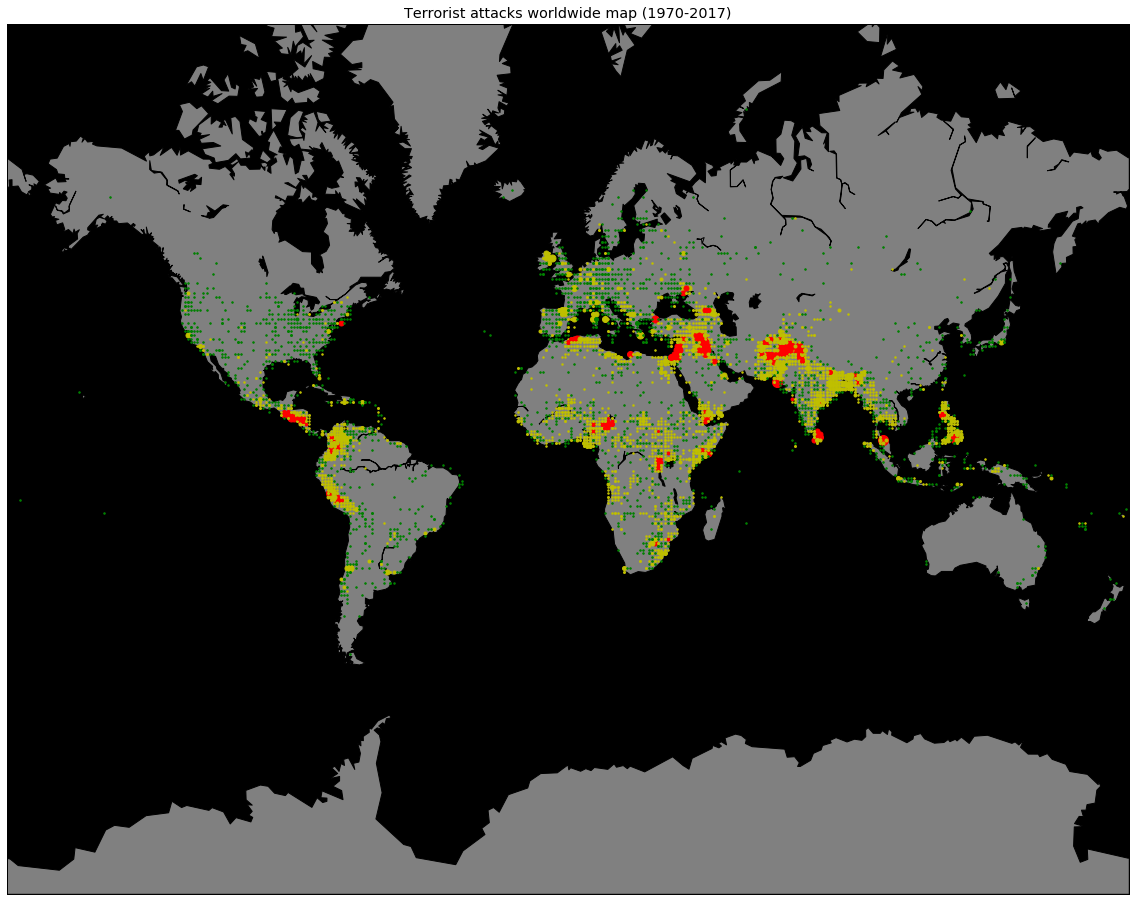

In [12]:
def sizeBasedOnNumberOfAttacks(nbOfAttacks):
	if(nbOfAttacks < 10): return 3
	if(nbOfAttacks < 50): return 4
	if(nbOfAttacks < 100): return 6
	if(nbOfAttacks < 200): return 8
	if(nbOfAttacks < 500): return 10
	if(nbOfAttacks < 1000): return 12
	if(nbOfAttacks < 2000): return 14
	return 20
	
def colorBasedOnKilled(nkill):
	if(nkill < 5): return 'g.'
	if(nkill < 500): return 'y.'
	return 'r.'

plt.figure(figsize=(25, 16))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='gray',lake_color='black')
m.drawmapboundary(fill_color='black')
plt.title("Terrorist attacks worldwide map (1970-2017)")

slovarKoordinat = {}

for i in range (1, len(terrorism)):
		
	try:
		lat = int(float(terrorism[i][10])) # Severno
		lon = int(float(terrorism[i][11]))	# Vzhodno
		nkill = int(terrorism[i][22]) # število umrlih
		nwound = int(terrorism[i][23]) # število poškodovanih
		
		if (lat, lon) not in slovarKoordinat:
			slovarKoordinat[(lat, lon)] = (0, 0, 0) #nb of attacks, nkill, nwound
		
		nbOfAttacks, kill, wound = slovarKoordinat[(lat, lon)]
		slovarKoordinat[(lat, lon)] = (nbOfAttacks + 1, kill + nkill, wound + nwound)
		
	except ValueError:
	# do nothing
		continue
	
for key, value in slovarKoordinat.items():
	lat, lon = key
	nbOfAttacks, nkill, nwound = value
	
	try:
		lat = int(lat)
		lon = int(lon)
		
		markerSize = sizeBasedOnNumberOfAttacks(nbOfAttacks)
		color = colorBasedOnKilled(nkill)
		
		x,y = m(lon, lat)
		m.plot(x, y, color, markersize=markerSize)
	except ValueError:
	# do nothing
		continue

plt.show()


C:\Users\Andrej\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'Forecast For Number Of Attacks Per Year For 5 Years')

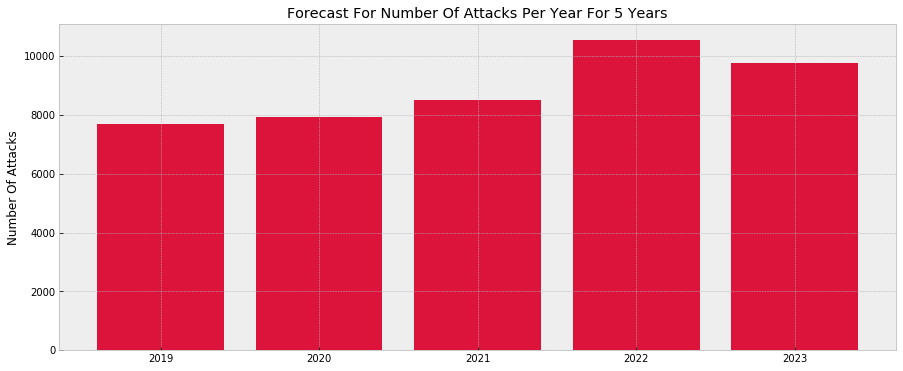

In [7]:
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Xn = np.array(list(number_of_attacks.keys()),dtype=int)
yn = np.array(list(number_of_attacks.values()), dtype=int)
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, random_state=1)

D=10
X = np.zeros((len(X_train), D), dtype=int)
for d in range(0, D):
    X[:, d] = X_train.ravel()**d
    
model = Lasso(alpha=0.1)
model.fit(X, y_train)


X_test2 = np.zeros((len(X_test), D), dtype=int)
for d in range(0, D):
    X_test2[:, d] = X_test.ravel()**d

hx = model.predict(X_test2)

x_new = np.array([2018,2019,2020,2021,2022,2023,2024])
X_new = np.zeros((len(x_new), D), dtype=int)
for d in range(0, D):
    X_new[:, d] = x_new.ravel()**d
y_new = model.predict(X_new)

x_os = range(5)
x_names = [2019, 2020, 2021, 2022, 2023]
plt.figure(figsize = (15, 6))
plt.bar(x_os, y_new[1:6], color = 'crimson', align = 'center')
plt.xticks(x_os)
plt.gca().set_xticklabels(x_names)
plt.ylabel('Number Of Attacks')
plt.title("Forecast For Number Of Attacks Per Year For 5 Years")

In [13]:
terrorisms = dict()
terrorisms["1970-1978"] = terrorism[terrorism[:, 1].astype(int) <= 1978, :]
terrorisms["1979-1988"] = terrorism[(1979 <= terrorism[:, 1].astype(int)) & (terrorism[:, 1].astype(int) <= 1988), :]
terrorisms["1989-1997"] = terrorism[(1989 <= terrorism[:, 1].astype(int)) & (terrorism[:, 1].astype(int) <= 1997), :]
terrorisms["1998-2005"] = terrorism[(1998 <= terrorism[:, 1].astype(int)) & (terrorism[:, 1].astype(int) <= 2005), :]
terrorisms["2006-2017"] = terrorism[2006 <= terrorism[:, 1].astype(int), :]

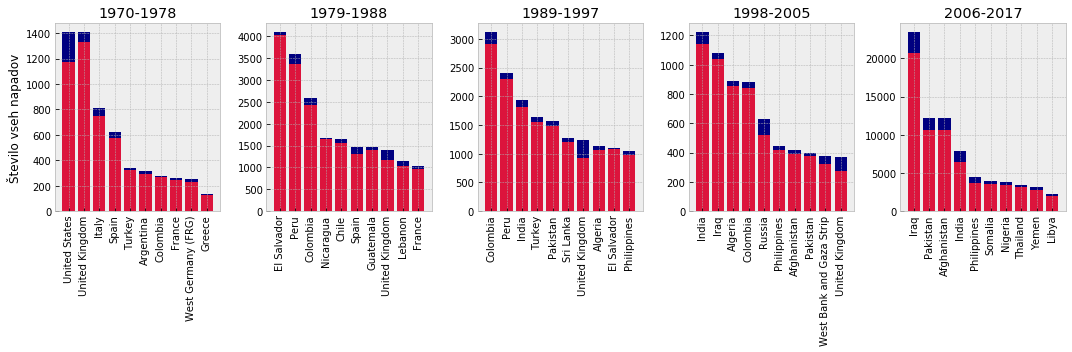

In [14]:
plot = 0
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for obdobje, t in terrorisms.items():
    countries = t[:, 6]

    attacks_country = defaultdict(int)
    for i in range(len(countries)):
        attacks_country[countries[i]] += 1

    attacks_country = sorted(attacks_country.items(), reverse = True, key = lambda x: x[1])

    success_true = []
    success_false = []
    success_country = []
    attacks_country_success = defaultdict(list)
    for i in range(10):
        success = t[t[:, 6] == attacks_country[i][0], 14]
        success_true.append(len(np.where(success == '1')[0]))
        success_false.append(len(np.where(success == '0')[0]))
        success_country.append(attacks_country[i][0])

    x = range(len(success_country))

    ax[plot].bar(x, success_true, color = 'crimson', align = 'center')
    ax[plot].bar(x, success_false, bottom = success_true, color = 'navy', align = 'center')
    ax[plot].set_xticks(x)
    ax[plot].set_xticklabels(success_country, rotation = 90)
    if plot == 0:
        ax[plot].set_ylabel('Število vseh napadov')
    ax[plot].title.set_text(obdobje)
    plot += 1
plt.tight_layout()
plt.show()

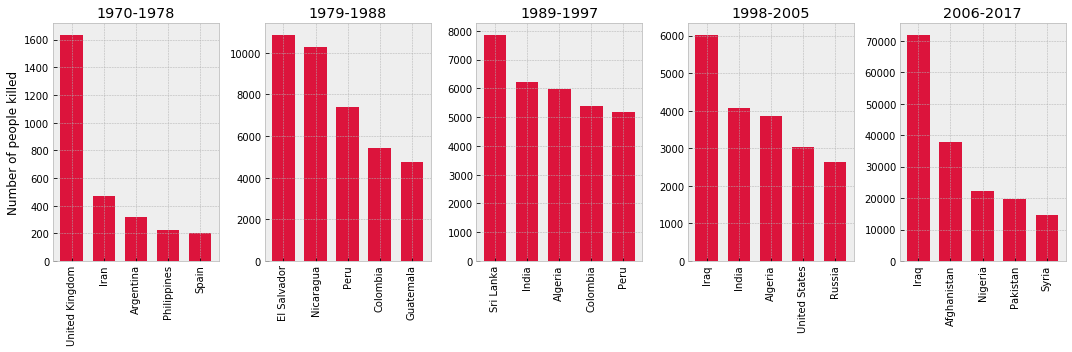

In [15]:
plot = 0
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for obdobje, t in terrorisms.items():
    countries = defaultdict(int)
    for i in t:
        if i[22]:
            countries[i[6]] += int(i[22])

    country_killed = sorted([(x, countries[x]) for x in countries.keys() if countries[x] > 100], key=lambda tup: tup[1], reverse=True)[:5]
    ax[plot].bar([x[0] for x in country_killed], [y[1] for y in country_killed], color = 'crimson', width=0.7)
    for tick in ax[plot].get_xticklabels():
        tick.set_rotation(90)
    ax[plot].set_title(obdobje)
    if plot == 0:
        ax[plot].set_ylabel('Number of people killed')
    plot += 1
plt.tight_layout()
plt.show()

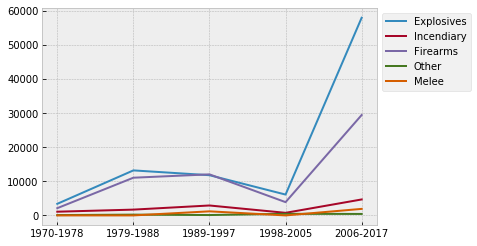

In [16]:
weapons_obdobja = dict()
for obdobje, t in terrorisms.items():
    weapons1 = defaultdict(int)
    for attack in t:
        if attack[20] != 'Unknown':
            weapons1[attack[20]] += 1
            
    weapons = defaultdict(int)
    for name, count in weapons1.items():
        if count < 500:
            weapons["Other"] += count
        else:
            weapons[name] = count

    weapons_obdobja[obdobje] = weapons

    
all_types = set()
for obdobje in weapons_obdobja.values():
    all_types.update(obdobje)

weapons_types = defaultdict(list)
for obdobje in weapons_obdobja.values():
    for _type, count in obdobje.items():
        weapons_types[_type].append(count)
    for _type in all_types:
        if _type not in obdobje:
            weapons_types[_type].append(0)

obdobja = [obdobje for obdobje in weapons_obdobja]
fig, ax = plt.subplots()
for name, data in weapons_types.items():
    ax.plot(obdobja, data, label=name)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()